In [24]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

## 단변량 분석

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('customer_data_.csv', encoding='cp949')

In [4]:
# 지표를 쉽게 보기 위함

# AGE컬럼 매핑
age_mapping = {1: '20대', 2:'30대', 3:'40대', 4:'50대', 5:'60대', 6:'70대'}
data['AGE'] = data['AGE'].map(age_mapping)

# 성별컬럼 매핑
gender_mapping = {0: '여성', 1:'남성'}
data['성별'] = data['성별'].map(gender_mapping)

# 갱신컬럼 매핑
renewal_mapping = {0: '비갱신', 1:'갱신'}
data['갱신'] = data['갱신'].map(renewal_mapping)

In [5]:
import warnings
warnings.filterwarnings('ignore')

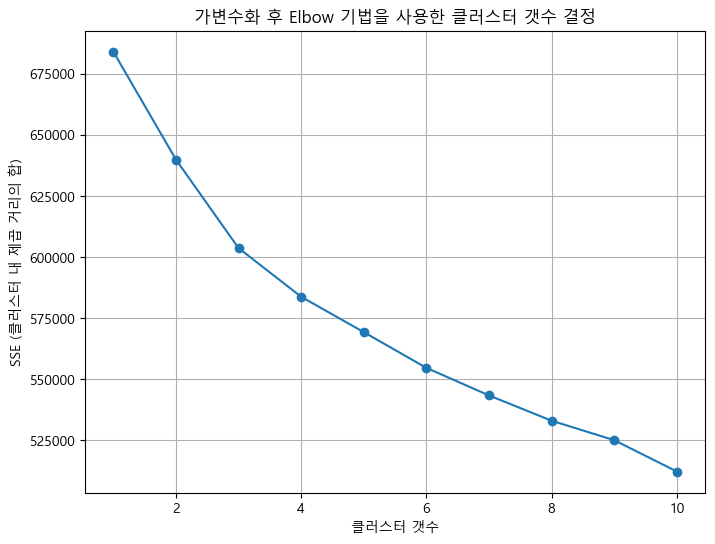

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

categorical_columns = ["AGE", "등록(계/피)", "고용상태", "성별", "갱신", "상품타입", "교육수준", "지역",
                       "결혼여부", "타 상품 보유 현황", "온라인방문빈도", "갱신인센티브", "판매채널", "자동차", "거주지사이즈"]

df_encoded = pd.get_dummies(data, columns=categorical_columns)

income_data_encoded = df_encoded.values
scaler = StandardScaler()
income_data_scaled_encoded = scaler.fit_transform(income_data_encoded)

# Elbow 기법을 사용하여 최적의 클러스터 갯수 찾기
sse_encoded = []
for k in range(1, 11):
    kmeans_encoded = KMeans(n_clusters=k, random_state=42)
    kmeans_encoded.fit(income_data_scaled_encoded)
    sse_encoded.append(kmeans_encoded.inertia_)

# Elbow 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse_encoded, marker='o')
plt.xlabel('클러스터 갯수')
plt.ylabel('SSE (클러스터 내 제곱 거리의 합)')
plt.title('가변수화 후 Elbow 기법을 사용한 클러스터 갯수 결정')
plt.grid()
plt.show()

In [11]:
kmeans_encoded = KMeans(n_clusters=5, random_state=42)
kmeans_encoded.fit(income_data_scaled_encoded)

KMeans(n_clusters=5, random_state=42)

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

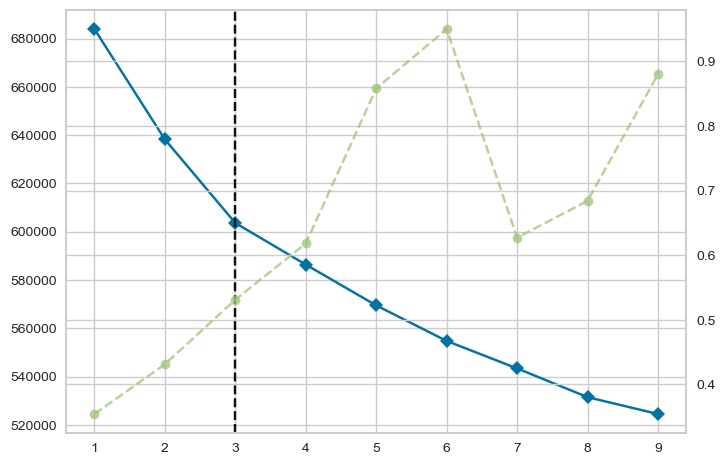

In [17]:
### 엘보우 포인트 뽑기
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(income_data_scaled_encoded)

In [21]:
income_data_scaled_encoded.shape

(12000, 57)

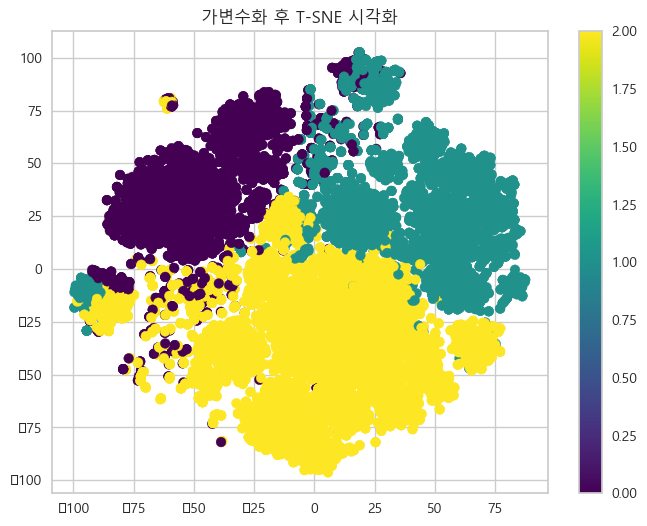

In [25]:
# T-SNE를 사용한 시각화
tsne = TSNE(n_components=2, random_state=42)
tsne_result_encoded = tsne.fit_transform(income_data_scaled_encoded)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_result_encoded[:, 0], tsne_result_encoded[:, 1], c=kmeans_encoded.labels_, cmap='viridis')
plt.title('가변수화 후 T-SNE 시각화')
plt.colorbar()
plt.show()


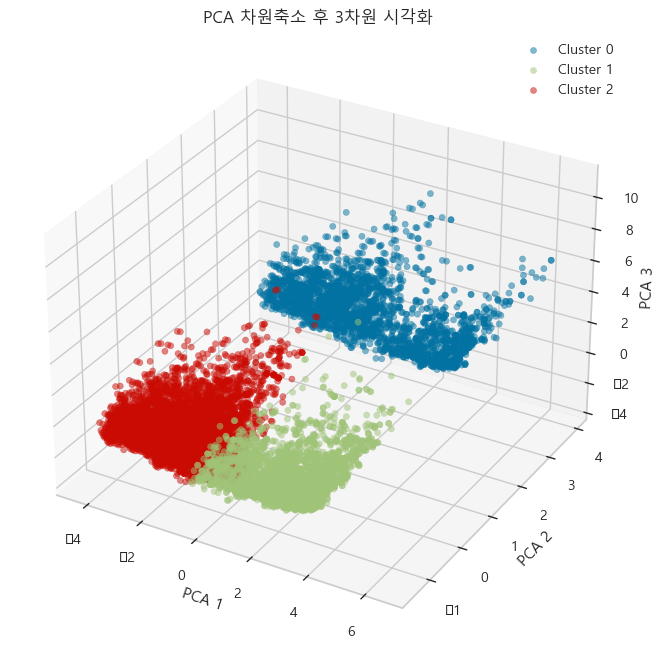

In [28]:
# PCA를 사용한 3D 시각화
from mpl_toolkits.mplot3d import Axes3D  # 3D 그래프를 그리기 위한 모듈

# PCA를 사용하여 3차원으로 축소
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(income_data_scaled_encoded)

# 3D 그래프 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 각 클러스터에 대한 3D 산점도 그리기
for cluster_label in range(optimal_k_encoded):
    ax.scatter(pca_result_3d[kmeans_encoded.labels_ == cluster_label, 0],
               pca_result_3d[kmeans_encoded.labels_ == cluster_label, 1],
               pca_result_3d[kmeans_encoded.labels_ == cluster_label, 2],
               label=f'Cluster {cluster_label}', alpha=0.5)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('PCA 차원축소 후 3차원 시각화')
ax.legend()
plt.show()


In [36]:
## 클러스터링 결과 label 
kmeans_encoded.labels_ 

array([0, 2, 1, ..., 0, 2, 0])

In [31]:
## clust 열은 이미 있기 때문에 clust_ 컬럼 새로 만들어서 
data["clust_"] = kmeans_encoded.labels_

In [37]:
cluster_0_idx = data.loc[data["clust_"] == 0].index ## 클러스터 0 인덱스
cluster_1_idx = data.loc[data["clust_"] == 1].index ## 클러스터 1 인덱스
cluster_2_idx = data.loc[data["clust_"] == 2].index ## 클러스터 2 인덱스

data_cluster_0 = data.loc[cluster_0_idx] ## 클러스터 0 데이터프레임
data_cluster_2 = data.loc[cluster_1_idx] ## 클러스터 1 데이터프레임
data_cluster_1 = data.loc[cluster_2_idx] ## 클러스터 2 데이터프레임

In [38]:
display(data_cluster_0.head(3))
display(data_cluster_1.head(3))
display(data_cluster_2.head(3))

,clust,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈,clust_
0,2,40대,피보험자,무직,남성,2.616381,비갱신,기본,대학졸업,0,...,80000,0,1,자주방문,없음,자사영업,631000,일반세단,소,0
5,0,40대,피보험자,고용,여성,8.376726,비갱신,기본,고졸이하,61046700,...,70000,0,2,자주방문,설계사독려,자사영업,3000,컴팩트카,중,0
13,0,50대,피보험자,고용,남성,3.962256,비갱신,중급,고졸이하,41439200,...,100000,0,1,자주방문,없음,자사영업,551000,일반세단,중,0


,clust,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈,clust_
1,4,20대,계약자,고용,여성,6.352530,비갱신,기본,고졸이하,102887400,...,80000,1,4이상,비방문,포인트,인터넷,54000,일반세단,중,2
3,0,60대,계약자,고용,남성,13.480284,비갱신,고급,고졸이하,51562500,...,110000,0,2,비방문,할인,자사영업,1264000,컴팩트카,대,2
4,3,50대,계약자,고용,여성,9.776436,비갱신,기본,석사,26820200,...,120000,0,3,비방문,없음,대리점,947000,SUV,중,2


,clust,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈,clust_
2,5,30대,계약자,휴직,여성,4.974354,비갱신,기본,대학졸업,22159500,...,60000,0,4이상,비방문,할인,자사영업,362000,일반세단,중,1
6,5,40대,계약자,휴직,여성,6.029520,비갱신,기본,대학졸업,15756400,...,70000,0,4이상,비방문,할인,콜센터,439000,일반세단,중,1
9,2,30대,계약자,무직,여성,7.396929,비갱신,기본,대학졸업,0,...,60000,0,2,비방문,할인,대리점,50000,컴팩트카,중,1


### 회귀이용하여 소득 예측후 마케팅 방안 수립

In [40]:
target = "소득" ### 타겟을 소득으로 지정

In [41]:
df_encoded ## 가변수화된 데이터 프레임

,clust,Willingness to pay/Stay,소득,월 납입액,VOC,총지불금액,AGE_20대,AGE_30대,AGE_40대,AGE_50대,...,판매채널_자사영업,판매채널_콜센터,자동차_SUV,자동차_고급차,자동차_스포츠카,자동차_일반세단,자동차_컴팩트카,거주지사이즈_대,거주지사이즈_소,거주지사이즈_중
0,2,2.616381,0,80000,0,631000,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
1,4,6.352530,102887400,80000,1,54000,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,5,4.974354,22159500,60000,0,362000,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
3,0,13.480284,51562500,110000,0,1264000,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,3,9.776436,26820200,120000,0,947000,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,25.985100,86451000,70000,0,245000,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
11996,0,3.441000,25962000,80000,0,468000,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
11997,2,9.057600,0,90000,3,977000,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
11998,4,8.347200,26366000,100000,0,854000,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0


In [42]:
### 데이터 가변수화 및 스케일링

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop([target, "clust"], axis= 1)
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

scaler_reg = StandardScaler() ## 스케일러 클래스 호출
scaler_reg.fit(X_train) ## 스케일러 피팅

X_train_scaled = scaler_reg.transform(X_train) ## X_train 변환
X_test_scaled = scaler_reg.transform(X_test) ## X_test 변환



In [43]:
## catboost 모델 사용 -> 카테고리 변수가 많기 때문
from catboost import CatBoostRegressor

model = CatBoostRegressor()
model.fit(X_train_scaled, y_train) ## 모델 학습


Learning rate set to 0.05853
0:	learn: 35332798.5297969	total: 183ms	remaining: 3m 2s
1:	learn: 33520010.1232254	total: 189ms	remaining: 1m 34s
2:	learn: 31846712.8931276	total: 195ms	remaining: 1m 4s
3:	learn: 30292966.8125271	total: 200ms	remaining: 49.7s
4:	learn: 28833633.9813315	total: 205ms	remaining: 40.7s
5:	learn: 27439877.0644423	total: 210ms	remaining: 34.9s
6:	learn: 26146357.9052352	total: 216ms	remaining: 30.7s
7:	learn: 24942207.6935509	total: 221ms	remaining: 27.5s
8:	learn: 23813793.2527172	total: 226ms	remaining: 24.9s
9:	learn: 22706259.4463059	total: 232ms	remaining: 22.9s
10:	learn: 21716111.1433810	total: 237ms	remaining: 21.3s
11:	learn: 20851771.5399184	total: 243ms	remaining: 20s
12:	learn: 19938447.9603723	total: 247ms	remaining: 18.7s
13:	learn: 19180313.9700198	total: 251ms	remaining: 17.7s
14:	learn: 18367124.4929298	total: 256ms	remaining: 16.8s
15:	learn: 17611284.3404843	total: 260ms	remaining: 16s
16:	learn: 17008205.9602998	total: 264ms	remaining: 15.3

In [46]:
## 모델 평가 지표 R2

from sklearn.metrics import r2_score

y_pred = model.predict(X_test_scaled)
score = r2_score(y_test, y_pred)

print(f"r2: {score}")

r2: 0.957455155728079


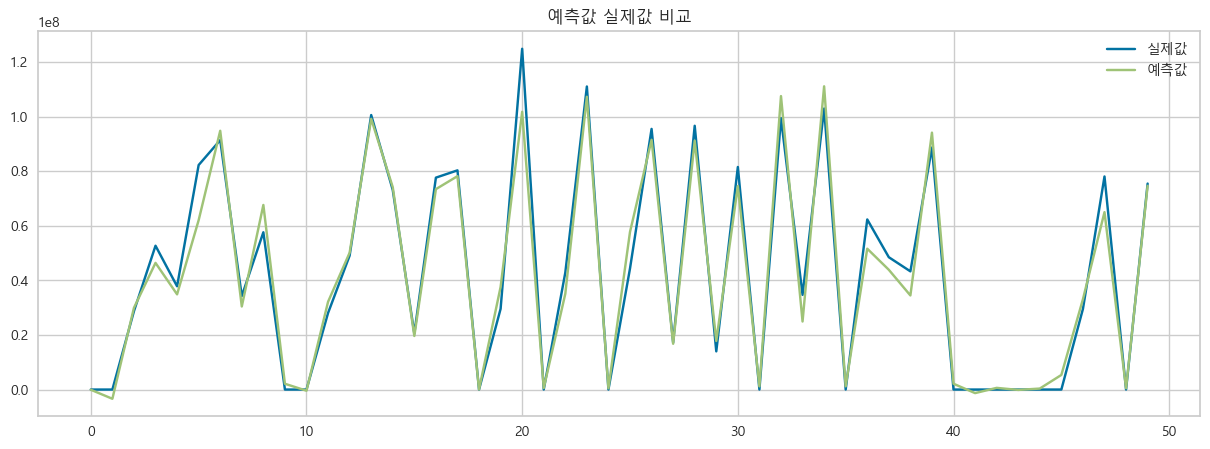

In [80]:
## 예측결과 시각화

random_idx = np.random.randint(0, len(y_test), size = 50) ## 랜덤으로 50개의 인덱스만 가져옴
plt.figure(figsize= (15,5))
plt.plot(y_test.values[random_idx], label = "실제값") ## 랜덤으로 지정된 100개의 인덱스에 해당하는 실제값 가져옴
plt.plot(y_pred[random_idx], label = "예측값") ## ## 랜덤으로 지정된 100개의 인덱스에 해당하는 예측값 가져옴
plt.title("예측값 실제값 비교")
plt.legend()
plt.show()

In [81]:
data.columns

Index(['clust', 'AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay',
       '갱신', '상품타입', '교육수준', '소득', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황',
       '온라인방문빈도', '갱신인센티브', '판매채널', '총지불금액', '자동차', '거주지사이즈', 'clust_'],
      dtype='object')